In [1]:
import numpy as np
import pandas as pd
from keras.callbacks import ReduceLROnPlateau
from keras.utils.np_utils import to_categorical
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Convolution2D, MaxPooling2D, Flatten, Dense
from sklearn.model_selection import train_test_split
from keras.preprocessing.image import ImageDataGenerator

/opt/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [2]:
train = pd.read_csv('./digit-recognizer/train.csv')
test = pd.read_csv('./digit-recognizer/test.csv')
target = train.iloc[:, 0].values
train = train.drop(['label'], axis=1)

In [3]:
train = train/255
test = test/255
target = to_categorical(target, num_classes = 10)

In [4]:
train = train.values.reshape(-1,28,28,1)
test = test.values.reshape(-1,28,28,1)

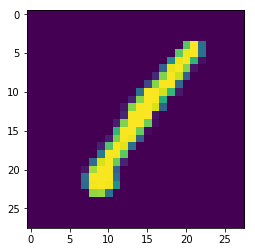

In [5]:
g = plt.imshow(train[0][:,:,0])

In [6]:
X_train, X_test, Y_train, Y_test = train_test_split(train, target, test_size=0.1, random_state=2)

In [7]:
train.shape, test.shape, target.shape, X_train.shape, X_test.shape, Y_train.shape, Y_test.shape

((42000, 28, 28, 1),
 (28000, 28, 28, 1),
 (42000, 10),
 (37800, 28, 28, 1),
 (4200, 28, 28, 1),
 (37800, 10),
 (4200, 10))

In [8]:
classifier = Sequential()

In [9]:
classifier.add(Convolution2D(32, 3, 3, input_shape=(28, 28, 1), activation='relu'))

/opt/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3), input_shape=(28, 28, 1..., activation="relu")`
  """Entry point for launching an IPython kernel.


In [10]:
classifier.add(MaxPooling2D(pool_size=(2, 2)))

In [11]:
classifier.add(Flatten())

In [12]:
classifier.add(Dense(128, activation='relu'))
classifier.add(Dense(10, activation='sigmoid'))

In [13]:
classifier.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [14]:
train_datagen = ImageDataGenerator(
        rescale=1./255,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True)

In [15]:
test_datagen = ImageDataGenerator(rescale=1./255)

In [16]:
train_datagen.fit(X_train)

In [17]:
# Set a learning rate annealer
learning_rate_reduction = ReduceLROnPlateau(monitor='val_acc', 
                                            patience=3, 
                                            verbose=1, 
                                            factor=0.5, 
                                            min_lr=0.00001)



In [18]:
# Fit the model
history = classifier.fit_generator(train_datagen.flow(X_train,Y_train, batch_size=86),
                              epochs = 1, validation_data = (X_test,Y_test),
                              verbose = 2, steps_per_epoch=X_train.shape[0] 
                              , callbacks=[learning_rate_reduction])



Epoch 1/1
 - 2506s - loss: 0.3468 - acc: 0.8895 - val_loss: nan - val_acc: 0.5067
